<a href="https://colab.research.google.com/github/VigneshNatarajann/Credit_card/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone Project - To predict credit card approval

Section 1:
  1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  
    - Bank sector is the one of the largest industry in todays world, to pick the suitable client is the major task for thier growth and revenue
    - there are some dependent variables which invloves to predict the suitable client such as Annual income, martial status and family members

  2. How is it going to impact the banking sector?
    - if the client could not able to pay the credit card bill, it affects the bank process and revenue
  
  3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
    - we filtering out the customers according to their expenditure and past history like credit scores

Section 2: Initial Hypothesis (or hypotheses)
  1. EDA

  - Descriptive Statistics review

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML_Notes/Capstone+Project+1/Credit_card.csv")
df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
dd= pd.read_csv('/content/drive/MyDrive/ML_Notes/Capstone+Project+1/Credit_card_label.csv')
dd.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
p1= pd.merge(df,dd, on='Ind_ID', how='inner')
p1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
p1.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
p1=df.drop([  'CHILDREN',  'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation'], axis=1)
p1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2


In [ ]:
p1.Marital_status.unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [ ]:
p1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2


In [ ]:
p1.shape

(1548, 12)

In [ ]:
p1.describe(include='all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
count,1.548000e+03,1541,1548,1548,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,4,5,5,6,NaN,NaN,NaN
top,NaN,F,N,Y,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN
freq,NaN,973,924,1010,NaN,798,1031,1049,1380,NaN,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,2.161499
std,4.171759e+04,NaN,NaN,NaN,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.947772
min,5.008827e+06,NaN,NaN,NaN,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.000000
25%,5.045070e+06,NaN,NaN,NaN,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,2.000000
50%,5.078842e+06,NaN,NaN,NaN,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,2.000000
75%,5.115673e+06,NaN,NaN,NaN,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,3.000000


In [ ]:
p1.nunique()

Ind_ID            1548
GENDER               2
Car_Owner            2
Propert_Owner        2
Annual_income      115
Type_Income          4
EDUCATION            5
Marital_status       5
Housing_type         6
Birthday_count    1270
Employed_days      956
Family_Members       7
dtype: int64

In [ ]:
from datetime import datetime, timedelta
current_date =datetime.now()
current_date.year

2024

In [ ]:
import math
p1['Age'] = round((abs(p1.Birthday_count / 365)),0)
p1['Age'].head()

0    51.0
1    37.0
2     NaN
3    37.0
4    37.0
Name: Age, dtype: float64

In [ ]:
p1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,Age
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2,51.0
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2,NaN
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0


In [ ]:
p1.describe()

,Ind_ID,Annual_income,Birthday_count,Employed_days,Family_Members,Age
count,1.548000e+03,1.525000e+03,1526.000000,1548.000000,1548.000000,1526.000000
mean,5.078920e+06,1.913993e+05,-16040.342071,59364.689922,2.161499,43.952818
std,4.171759e+04,1.132530e+05,4229.503202,137808.062701,0.947772,11.603295
min,5.008827e+06,3.375000e+04,-24946.000000,-14887.000000,1.000000,21.000000
25%,5.045070e+06,1.215000e+05,-19553.000000,-3174.500000,2.000000,34.000000
50%,5.078842e+06,1.665000e+05,-15661.500000,-1565.000000,2.000000,43.000000
75%,5.115673e+06,2.250000e+05,-12417.000000,-431.750000,3.000000,54.000000
max,5.150412e+06,1.575000e+06,-7705.000000,365243.000000,15.000000,68.000000


In [ ]:
p1.isnull().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count    22
Employed_days      0
Family_Members     0
Age               22
dtype: int64

In [ ]:
p1.nunique()

Ind_ID            1548
GENDER               2
Car_Owner            2
Propert_Owner        2
Annual_income      115
Type_Income          4
EDUCATION            5
Marital_status       5
Housing_type         6
Birthday_count    1270
Employed_days      956
Family_Members       7
Age                 48
dtype: int64

In [ ]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   GENDER          1541 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   Annual_income   1525 non-null   float64
 5   Type_Income     1548 non-null   object 
 6   EDUCATION       1548 non-null   object 
 7   Marital_status  1548 non-null   object 
 8   Housing_type    1548 non-null   object 
 9   Birthday_count  1526 non-null   float64
 10  Employed_days   1548 non-null   int64  
 11  Family_Members  1548 non-null   int64  
 12  Age             1526 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 157.3+ KB


In [ ]:
p1.Age.value_counts()

42.0    57
40.0    50
44.0    49
34.0    48
28.0    46
37.0    45
39.0    44
27.0    43
38.0    43
52.0    43
35.0    43
33.0    43
32.0    43
48.0    41
30.0    41
47.0    40
29.0    39
41.0    38
49.0    37
31.0    37
57.0    37
59.0    36
55.0    36
50.0    35
56.0    34
36.0    34
60.0    33
46.0    33
58.0    32
64.0    32
54.0    31
53.0    30
45.0    28
43.0    27
51.0    26
25.0    24
61.0    23
62.0    22
63.0    21
26.0    19
65.0    19
67.0    16
66.0    10
24.0     7
23.0     7
68.0     2
22.0     1
21.0     1
Name: Age, dtype: int64

<Axes: ylabel='Age'>

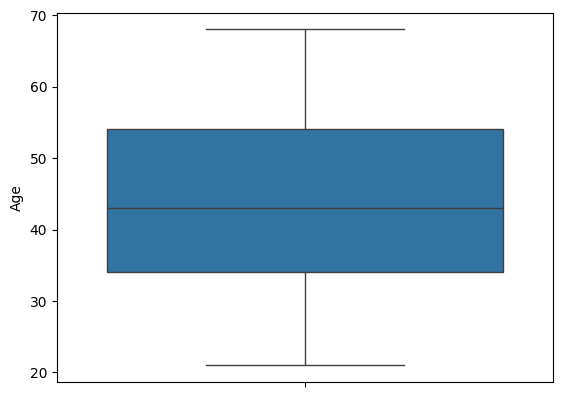

In [ ]:
sns.boxplot(y=p1['Age'])

#Encoding :

- Doing Label encoding for housing type and martial status


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Le = LabelEncoder()

In [ ]:
p1['Housing_type_encoded'] = Le.fit_transform(p1['Housing_type'])
p1.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,Age,Housing_type_encoded
1543,5028645,F,N,Y,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,2,33.0,1
1544,5023655,F,N,N,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,28.0,1
1545,5115992,M,Y,Y,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,4,36.0,1
1546,5118219,M,Y,N,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,2,42.0,1
1547,5053790,F,Y,Y,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,2,45.0,1


In [ ]:
p1['Marital_status_encoded']= Le.fit_transform(p1['Marital_status'])
p1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,Age,Housing_type_encoded,Marital_status_encoded
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2,51.0,1,1
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0,1,1
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2,NaN,1,1
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0,1,1
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0,1,1


In [ ]:
pd.get_dummies(p1,columns=['GENDER'])


,Ind_ID,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,Age,Housing_type_encoded,Marital_status_encoded,GENDER_F,GENDER_M
0,5008827,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2,51.0,1,1,0,1
1,5009744,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0,1,1,1,0
2,5009746,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2,NaN,1,1,1,0
3,5009749,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0,1,1,1,0
4,5009752,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2,37.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,N,Y,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,2,33.0,1,1,1,0
1544,5023655,N,N,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,28.0,1,3,1,0
1545,5115992,Y,Y,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,4,36.0,1,1,0,1
1546,5118219,Y,N,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,2,42.0,1,0,0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc=OneHotEncoder()

In [ ]:
p1=p1.dropna(axis=1)

<Axes: ylabel='Family_Members'>

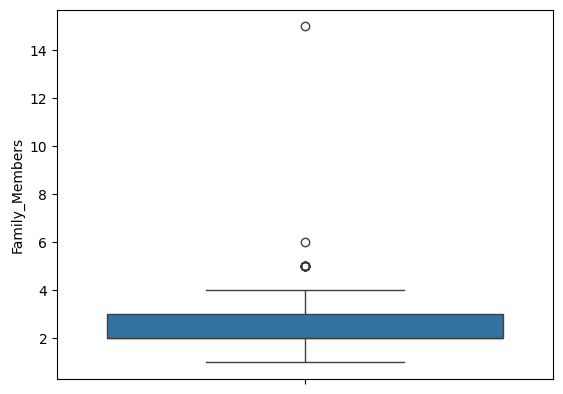

In [ ]:
sns.boxplot(y=p1.Family_Members)

In [ ]:
Q1= np.percentile(p1.Family_Members,25, interpolation = 'midpoint')
Q2= np.percentile(p1.Family_Members,50, interpolation = 'midpoint')
Q3= np.percentile(p1.Family_Members,75, interpolation = 'midpoint')
print(Q1,Q2,Q3)

2.0 2.0 3.0


In [ ]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier=[]

for x in p1.Family_Members :
  if ((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print("the outliers in the datase", outlier)

Interquartile range is 1.0
low_limit is 0.5
up_limit is 4.5
the outliers in the datase [6, 5, 5, 5, 5, 15, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [ ]:
p1["Family_Members"]= np.where(p1.Family_Members > up_lim, up_lim,p1.Family_Members)

<Axes: ylabel='Family_Members'>

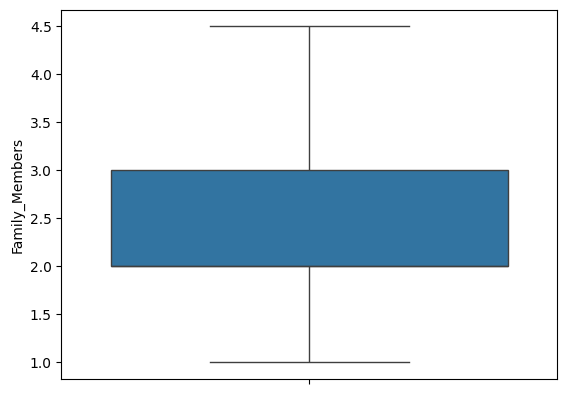

In [ ]:
sns.boxplot(p1.Family_Members)

In [ ]:
p1.isnull().sum()

Ind_ID                     0
GENDER                     7
Car_Owner                  0
Propert_Owner              0
Annual_income             23
Type_Income                0
EDUCATION                  0
Marital_status             0
Housing_type               0
Birthday_count            22
Employed_days              0
Family_Members             0
Age                       22
Housing_type_encoded       0
Marital_status_encoded     0
dtype: int64

In [ ]:
p1[p1.isnull().any(axis=1)]

,Ind_ID,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Family_Members,Housing_type_encoded,Marital_status_encoded


In [ ]:
p1[p1.Annual_income.isnull()].shape

(23, 15)

In [ ]:
p1[p1.Annual_income.isnull()]



,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,Age,Housing_type_encoded,Marital_status_encoded
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2.0,37.0,1,1
12,5018501,F,Y,Y,NaN,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,2.0,52.0,1,1
27,5024917,F,N,Y,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,-21832.0,365243,2.0,60.0,1,1
65,5058348,F,N,Y,NaN,Pensioner,Higher education,Separated,House / apartment,-24611.0,365243,1.0,67.0,1,2
76,5062137,M,N,Y,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,-12947.0,-137,2.0,35.0,1,3
107,5105056,M,Y,N,NaN,Commercial associate,Higher education,Single / not married,Municipal apartment,-11528.0,-606,1.0,32.0,2,3
125,5116305,F,N,Y,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,-22655.0,365243,2.0,62.0,1,1
152,5142183,M,Y,Y,NaN,Commercial associate,Higher education,Married,House / apartment,-17841.0,-4305,4.0,49.0,1,1
185,5033574,F,Y,Y,NaN,Working,Secondary / secondary special,Married,House / apartment,-14222.0,-141,3.0,39.0,1,1
215,5085769,F,N,Y,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-19310.0,-1477,2.0,53.0,1,1


In [ ]:
p2=p1.groupby(['Age','Car_Owner','Propert_Owner'])
p2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,Age,Housing_type_encoded
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2.0,51.0,1
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2.0,37.0,1
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2.0,37.0,1
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2.0,37.0,1
5,5009753,NaN,Y,N,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,2.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,5116594,M,Y,N,157500.0,Working,Higher education,Married,House / apartment,-15602.0,-611,2.0,43.0,1
1523,5132784,M,Y,Y,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-8854.0,-195,1.0,24.0,1
1524,5048458,F,Y,Y,126000.0,Working,Higher education,Married,House / apartment,-9441.0,-157,3.0,26.0,1
1527,5024096,F,Y,N,126000.0,State servant,Incomplete higher,Single / not married,House / apartment,-11978.0,-5206,1.0,33.0,1


In [ ]:
p1['Annual_income'].skewness()

NameError: name 'p1' is not defined

<Axes: xlabel='Annual_income', ylabel='Count'>

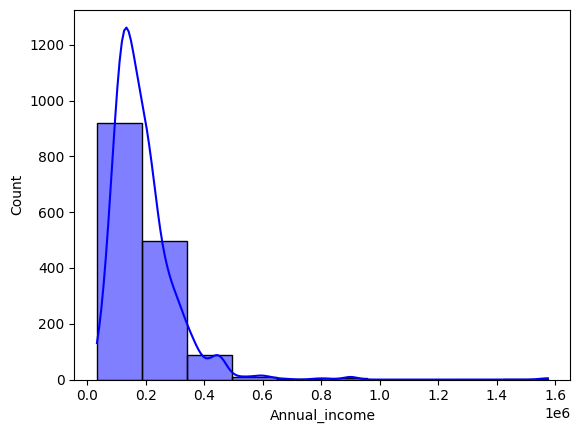

In [ ]:
sns.histplot(p1['Annual_income'],kde=True,color='Blue',bins=10)

In [ ]:
Annual_median=p1['Annual_income'].median()
Annual_median

166500.0

In [ ]:
p1['Annual_income']= p1['Annual_income'].fillna(Annual_median)
p1['Annual_income'].head()

0    180000.0
1    315000.0
2    315000.0
3    166500.0
4    315000.0
Name: Annual_income, dtype: float64

In [ ]:
p1.isnull().sum()

Ind_ID                     0
GENDER                     7
Car_Owner                  0
Propert_Owner              0
Annual_income              0
Type_Income                0
EDUCATION                  0
Marital_status             0
Housing_type               0
Birthday_count            22
Employed_days              0
Family_Members             0
Age                       22
Housing_type_encoded       0
Marital_status_encoded     0
dtype: int64

In [ ]:
gender_mode=p1['GENDER'].mode()

In [ ]:
p1['GENDER']=p1['GENDER'].fillna(gender_mode)
p1['GENDER'].head()

0    M
1    F
2    F
3    F
4    F
Name: GENDER, dtype: object

In [ ]:
age_median=p1['Age'].median()
p1['Age']=p1['Age'].fillna(age_median)

In [ ]:
p1.isnull().sum()

Ind_ID                     0
GENDER                     7
Car_Owner                  0
Propert_Owner              0
Annual_income              0
Type_Income                0
EDUCATION                  0
Marital_status             0
Housing_type               0
Birthday_count            22
Employed_days              0
Family_Members             0
Age                        0
Housing_type_encoded       0
Marital_status_encoded     0
dtype: int64

In [ ]:
p1=p1.drop(columns=['Birthday_count'],axis=1)
p1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Family_Members,Age,Housing_type_encoded,Marital_status_encoded
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,365243,2.0,51.0,1,1
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,2.0,37.0,1,1
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,2.0,43.0,1,1
3,5009749,F,Y,N,166500.0,Commercial associate,Higher education,Married,House / apartment,-586,2.0,37.0,1,1
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,2.0,37.0,1,1


In [ ]:
# @title Default title text
p1.isnull().sum()

Ind_ID                    0
GENDER                    7
Car_Owner                 0
Propert_Owner             0
Annual_income             0
Type_Income               0
EDUCATION                 0
Marital_status            0
Housing_type              0
Employed_days             0
Family_Members            0
Age                       0
Housing_type_encoded      0
Marital_status_encoded    0
dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [ ]:
X=p1.iloc[::-1]
Y=p1.iloc[:-1]
print(X)
print(Y)

       Ind_ID GENDER Car_Owner Propert_Owner  Annual_income  \
1547  5053790      F         Y             Y       225000.0   
1546  5118219      M         Y             N       270000.0   
1545  5115992      M         Y             Y       180000.0   
1544  5023655      F         N             N       225000.0   
1543  5028645      F         N             Y       166500.0   
...       ...    ...       ...           ...            ...   
4     5009752      F         Y             N       315000.0   
3     5009749      F         Y             N       166500.0   
2     5009746      F         Y             N       315000.0   
1     5009744      F         Y             N       315000.0   
0     5008827      M         Y             Y       180000.0   

               Type_Income                      EDUCATION  \
1547               Working               Higher education   
1546               Working  Secondary / secondary special   
1545               Working               Higher education   